<a href="https://colab.research.google.com/github/AlbionKransiqi/Car-Classification-Deep-Learning/blob/main/Data_pre_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stanford Car Dataset: Vehicle Classification


In recent years the role of Automotive E-Commerce has increased significantly. It is estimated that more than 1 million vehicles are sold online each year. However, along with the increase in market share, there has been a sharp increase in fraud posts. In the United Kingdom, in 2020, there were more than 70,000 reported cases of fraud posts, with victims losing an estimated $80million (Murray, 2020). Usually, such posts contain inconsistencies, e.g., the images they upload do not correspond to the car information.

Using advanced machine learning techniques appropriate for image recognition, we can help solve the challenge mentioned above. 

**Goal**: This project aims to build a model that classifies a car's make and model given an image.

## Dataset

We will be using [The Stanford Cars Dataset](https://www.kaggle.com/jessicali9530/stanford-cars-dataset), an extensive collection of
vehicle images. It consists of 16,185 total images labeled with 196 classes based on the car’s Make/Model/Year (e.g., Mercedes C class 2009). The data is split into 8,144 training images and 8,041 testing images (roughly 50-50% train-test split), so each class of car has around 40 images in the training set and the same amount in the testing set as well.

**Importing necessary libraries**

In [1]:
## basic libraries → data exploration
import numpy as np
import pandas as pd
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt
from google.colab import drive

## traditional machine learning methods
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## deep learning
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Flatten, Input, Conv1D, Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications import efficientnet

## Data Import

Data is being imported from my google drive folder. The link to the data: https://drive.google.com/drive/folders/19yBRIajHp1CI1Bz3lGSUpNp0kP3NDZ8z?usp=sharing

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## loading the data
train_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/train/*/*")
test_car = glob("/content/drive/My Drive/Colab Notebooks/car_data/test/*/*")

## Data Exploration

The functions below extract make, model and the year of the car and plots its image for both training and testing set. 

Next, we will create a dataframe which contains 3 columns:

- Cars: Contains all the information about each car (Make/Model/Year).
- Make: Just gives the make of the car.
- Year: gives the production year of a given car.

Furthermore, I create a couple of barplots for the make and year columns. Based on those plots, we can see how the data is distributed. E.g. which make of the car has most images in the dataset.



**Feature Engineering on the dataset:**

In [4]:
def get_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[48::][:-9]
  return car_class

def get_test_car_class(car):
  '''
  This function will return the car label/class per given image
  '''
  car_class = car.replace("/","").replace("\\","")[47::][:-9]
  return car_class

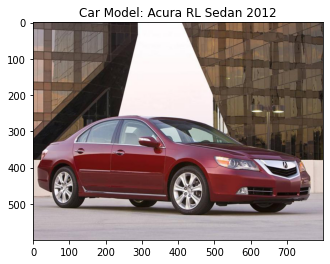

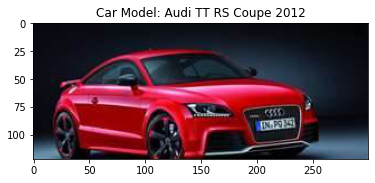

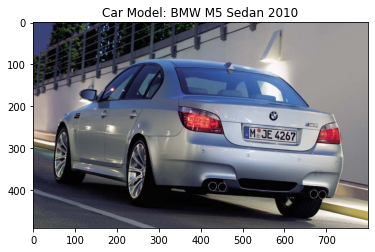

In [5]:
## showing some car images and their classes
for i in range(1,2100,700):
    image = Image.open(train_car[i])
    label = get_car_class(train_car[i])
    imgplot = plt.imshow(image)
    plt.title(f"Car Model: {label}")
    plt.show()

In [6]:
y_train = []
y_test = []

for i in range(len(train_car)): 
  y_train.append(get_car_class(train_car[i]))

## converting each photo into a numpy array of RGB pixels
for i in range(len(test_car)): 
    y_test.append(get_test_car_class(test_car[i]))

In [7]:
df_train_labels = pd.DataFrame(y_train, columns =['Cars'])
make_extraction = df_train_labels["Cars"].str.split(" ", n = 1, expand = True)
df_train_labels["Make"]= make_extraction[0]

year_extraction = df_train_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_train_labels["Year"]= year_extraction[1]
df_train_labels

,Cars,Make,Year
0,Acura RL Sedan 2012,Acura,2012
1,Acura RL Sedan 2012,Acura,2012
2,Acura RL Sedan 2012,Acura,2012
3,Acura RL Sedan 2012,Acura,2012
4,Acura RL Sedan 2012,Acura,2012
...,...,...,...
8139,Volvo XC90 SUV 2007,Volvo,2007
8140,Volvo XC90 SUV 2007,Volvo,2007
8141,Volvo XC90 SUV 2007,Volvo,2007
8142,Volvo XC90 SUV 2007,Volvo,2007


In [8]:
df_test_labels = pd.DataFrame(y_test, columns =['Cars'])
make_extraction = df_test_labels["Cars"].str.split(" ", n = 1, expand = True)
df_test_labels["Make"]= make_extraction[0]

year_extraction = df_test_labels["Cars"].str.rsplit(" ", n = 1, expand = True)
df_test_labels["Year"]= year_extraction[1]

In [9]:
## creating a list with car classes
model_names = list(df_test_labels["Cars"].unique())

**Saving the dataframes as csv files to use them later**

In [14]:
df_train_labels.to_csv(f'/content/drive/My Drive/Colab Notebooks/car_data/training_labels.csv')

In [15]:
df_test_labels.to_csv(f'/content/drive/My Drive/Colab Notebooks/car_data/testing_labels.csv')

**Creating barplots for Car's make and year of production**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


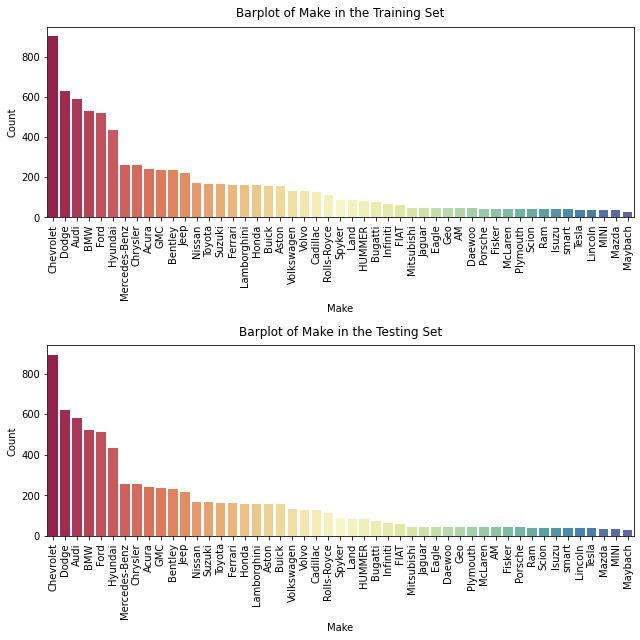

In [16]:
import seaborn as sns

# Countplot of Make in the Stanford Cars Training and Testing Set
fig = plt.figure(figsize = (9, 9))
plt.subplot(2, 1, 1)

sns.countplot('Make', data = df_train_labels, order = df_train_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Training Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)

plt.subplot(2, 1, 2)
sns.countplot('Make', data = df_test_labels, order = df_test_labels['Make'].value_counts().index, palette = "Spectral")
plt.title('Barplot of Make in the Testing Set', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90), plt.tight_layout()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


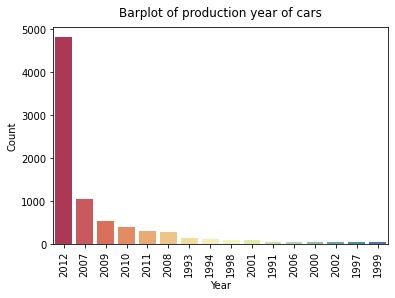

In [17]:
sns.countplot('Year', data = df_train_labels, order = df_train_labels['Year'].value_counts().index, palette = "Spectral")
plt.title('Barplot of production year of cars', y = 1.02)
plt.ylabel('Count'), plt.xticks(rotation = 90)
plt.show()